Importing the essential libraries and packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Importing the dataset from the file location

In [2]:
data = pd.read_excel('D:\\M.Tech Project\\Dataset.xlsx')
data.head()

,Pull,Inflation_Pressure,CIbefore,Soil_Condition,Wheel_Load,CIafter
0,470.0,12,468.550,Soft Soil,1000,1317.67
1,490.0,12,368.180,Soft Soil,1000,1400.56
2,490.0,12,900.000,Medium Soil,1000,1459.27
3,490.0,20,1113.985,Medium Soil,1000,1794.30
4,500.0,12,418.630,Soft Soil,1000,1211.94


Checking for null values present in the dataset

In [3]:
data.isna().sum()

Pull                  0
Inflation_Pressure    0
CIbefore              0
Soil_Condition        0
Wheel_Load            0
CIafter               0
dtype: int64

Replacing the categorical values present in Soil Condition column to numerical values

In [4]:
data['Soil_Condition'].replace({'Soft Soil':0,'Medium Soil':1,'Hard Soil':2},inplace = True)

Data Visualization through Pairplot

In [5]:
data.head()

,Pull,Inflation_Pressure,CIbefore,Soil_Condition,Wheel_Load,CIafter
0,470.0,12,468.550,0,1000,1317.67
1,490.0,12,368.180,0,1000,1400.56
2,490.0,12,900.000,1,1000,1459.27
3,490.0,20,1113.985,1,1000,1794.30
4,500.0,12,418.630,0,1000,1211.94


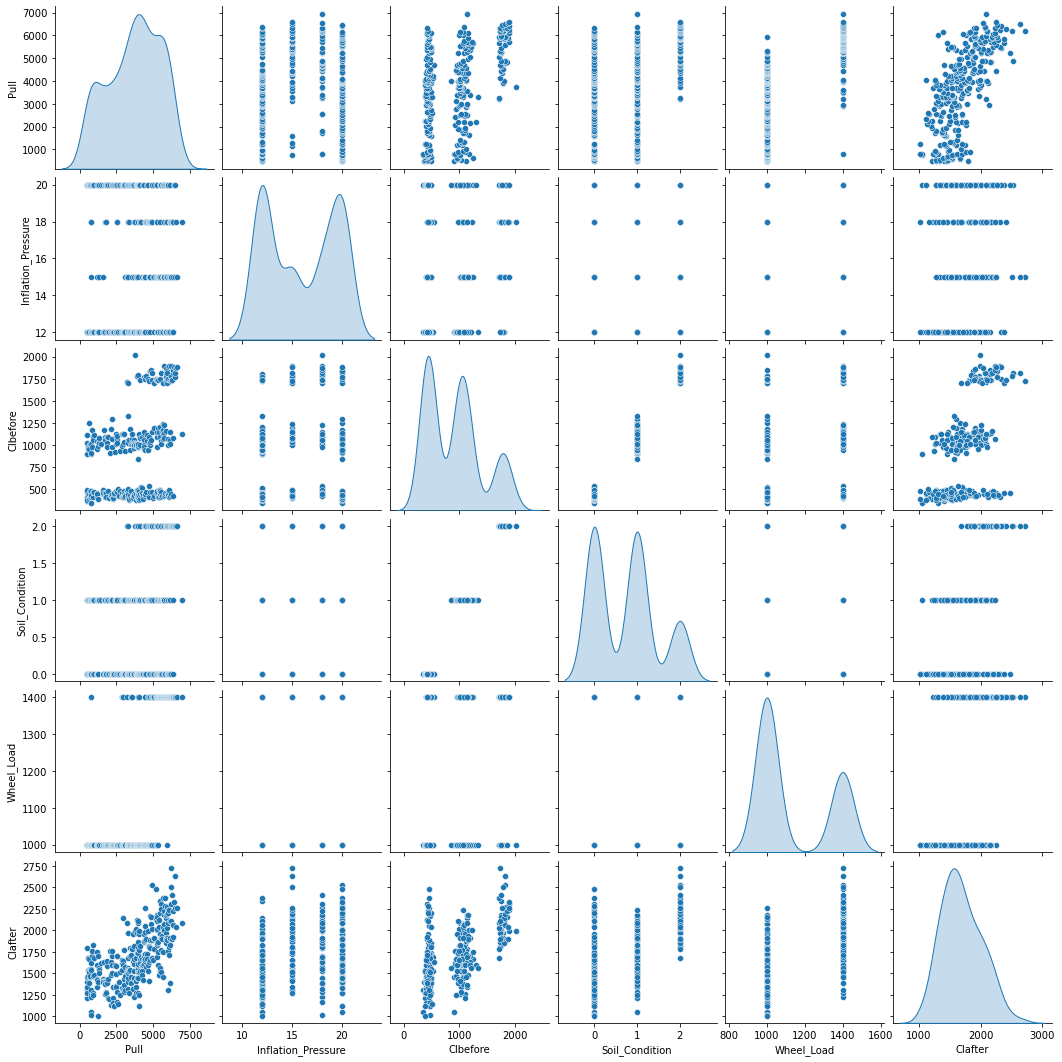

In [6]:
sns.pairplot(data[data.columns],diag_kind = "kde")

Statistical information of all features

In [7]:
data.describe()

,Pull,Inflation_Pressure,CIbefore,Soil_Condition,Wheel_Load,CIafter
count,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,3707.018533,15.937086,915.633277,0.741722,1136.423841,1692.703666
std,1756.192644,3.425430,483.955500,0.724177,189.940870,328.887506
min,470.000000,12.000000,345.000000,0.000000,1000.000000,1009.410000
25%,2350.000000,12.000000,450.187500,0.000000,1000.000000,1447.722500
50%,3940.000000,15.000000,981.325000,1.000000,1000.000000,1655.923000
75%,5248.422500,20.000000,1127.031000,1.000000,1400.000000,1909.599500
max,6950.330000,20.000000,2013.701000,2.000000,1400.000000,2725.797000


Dividing the whole dataset in to x and y variables

In [8]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
x = data.iloc[:,0:5]
y = data.iloc[:,5:]

#data[col_to_scale]=scaler.fit_transform(data[col_to_scale])
X_target_scaler = preprocessing.StandardScaler()
Y_target_scaler = preprocessing.StandardScaler()
x = X_target_scaler.fit_transform(x)
y = Y_target_scaler.fit_transform(y)

Splitting the whole dataset in to train and test dataset in which i have taken 20% of my data for testing and validation

In [9]:
x

array([[-1.84626168, -1.15127758, -0.92534401, -1.0259267 , -0.71943585],
       [-1.83485451, -1.15127758, -1.13308334, -1.0259267 , -0.71943585],
       [-1.83485451, -1.15127758, -0.03235674,  0.35724233, -0.71943585],
       ...,
       [ 1.61841646,  0.60323459,  1.97516432,  1.74041136,  1.389978  ],
       [ 1.64772719, -0.27402149,  1.99944439,  1.74041136,  1.389978  ],
       [ 1.84985091,  0.60323459,  0.4390296 ,  0.35724233,  1.389978  ]])

In [10]:
y

array([[-1.14220249e+00],
       [-8.89752716e-01],
       [-7.10945547e-01],
       [ 3.09421785e-01],
       [-1.46421377e+00],
       [-1.28555888e+00],
       [-1.27967478e+00],
       [-1.07678910e+00],
       [-6.78037840e-01],
       [-5.74816338e-02],
       [-4.69328970e-01],
       [-6.22023136e-02],
       [-9.35497627e-01],
       [-4.83743795e-01],
       [-5.56229072e-01],
       [-7.20575733e-01],
       [-6.73393300e-01],
       [-4.45856532e-01],
       [-4.24470330e-01],
       [-4.83043307e-01],
       [-1.95741821e+00],
       [-1.33605492e+00],
       [-1.97383704e+00],
       [-2.20603964e-01],
       [-1.18496271e+00],
       [-2.05730780e+00],
       [-1.42111244e+00],
       [ 2.92205039e-02],
       [ 2.10799169e-01],
       [-1.27967478e+00],
       [ 4.18755776e-01],
       [-1.33931067e+00],
       [-6.76713004e-01],
       [-6.43774841e-01],
       [-4.46962054e-02],
       [-7.95668044e-01],
       [-8.24089583e-01],
       [-1.08796036e+00],
       [-2.8

In [11]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2, random_state = 15)

Printing the shape of test and train datasets

In [12]:
x_train.shape

(241, 5)

In [13]:
x_test.shape

(61, 5)

Importing the keras libraries and Sequential and Dense functions.

In [14]:
import keras
from keras.models import Sequential
from keras.layers import Dense

Importing the loss function and performance metrics

In [15]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from math import sqrt

ANN code

In [16]:
import tensorflow as tf
from tensorflow import keras

model = keras.Sequential([
    keras.layers.Dense(8, input_shape=(5,), activation = 'relu'),
    keras.layers.Dense(6,activation = 'linear'),
    keras.layers.Dense(1,activation = 'linear'),
    
])

model.compile(optimizer = 'adam',
             loss = 'mse',
             cloning = '1e-3',
             metrics = ['mae','mse'])
model.fit(x_train,y_train)

8/8 [==============================] - 1s 10ms/step - loss: 0.7094 - mae: 0.6710 - mse: 0.7094


Defining the model_history variable and running the model for 500 epochs.

In [17]:
model_history = model.fit(x_train,y_train,validation_split = 0.2,epochs=500)

Epoch 1/500
6/6 [==============================] - 0s 87ms/step - loss: 0.6324 - mae: 0.6270 - mse: 0.6324 - val_loss: 0.7451 - val_mae: 0.7315 - val_mse: 0.7451
Epoch 2/500
6/6 [==============================] - 0s 12ms/step - loss: 0.6016 - mae: 0.6117 - mse: 0.6016 - val_loss: 0.7049 - val_mae: 0.7129 - val_mse: 0.7049
Epoch 3/500
6/6 [==============================] - 0s 11ms/step - loss: 0.5731 - mae: 0.5975 - mse: 0.5731 - val_loss: 0.6725 - val_mae: 0.6965 - val_mse: 0.6725
Epoch 4/500
6/6 [==============================] - 0s 12ms/step - loss: 0.5485 - mae: 0.5854 - mse: 0.5485 - val_loss: 0.6412 - val_mae: 0.6802 - val_mse: 0.6412
Epoch 5/500
6/6 [==============================] - 0s 11ms/step - loss: 0.5278 - mae: 0.5743 - mse: 0.5278 - val_loss: 0.6147 - val_mae: 0.6653 - val_mse: 0.6147
Epoch 6/500
6/6 [==============================] - 0s 11ms/step - loss: 0.5084 - mae: 0.5639 - mse: 0.5084 - val_loss: 0.5913 - val_mae: 0.6519 - val_mse: 0.5913
Epoch 7/500
6/6 [===========

6/6 [==============================] - 0s 11ms/step - loss: 0.3203 - mae: 0.4398 - mse: 0.3203 - val_loss: 0.5050 - val_mae: 0.5796 - val_mse: 0.5050
Epoch 52/500
6/6 [==============================] - 0s 10ms/step - loss: 0.3197 - mae: 0.4396 - mse: 0.3197 - val_loss: 0.5055 - val_mae: 0.5804 - val_mse: 0.5055
Epoch 53/500
6/6 [==============================] - 0s 11ms/step - loss: 0.3196 - mae: 0.4401 - mse: 0.3196 - val_loss: 0.5066 - val_mae: 0.5813 - val_mse: 0.5066
Epoch 54/500
6/6 [==============================] - 0s 11ms/step - loss: 0.3195 - mae: 0.4407 - mse: 0.3195 - val_loss: 0.5057 - val_mae: 0.5822 - val_mse: 0.5057
Epoch 55/500
6/6 [==============================] - 0s 11ms/step - loss: 0.3190 - mae: 0.4403 - mse: 0.3190 - val_loss: 0.5052 - val_mae: 0.5818 - val_mse: 0.5052
Epoch 56/500
6/6 [==============================] - 0s 11ms/step - loss: 0.3184 - mae: 0.4396 - mse: 0.3184 - val_loss: 0.5055 - val_mae: 0.5806 - val_mse: 0.5055
Epoch 57/500
6/6 [=================

6/6 [==============================] - 0s 11ms/step - loss: 0.3104 - mae: 0.4336 - mse: 0.3104 - val_loss: 0.5121 - val_mae: 0.5879 - val_mse: 0.5121
Epoch 102/500
6/6 [==============================] - 0s 11ms/step - loss: 0.3110 - mae: 0.4344 - mse: 0.3110 - val_loss: 0.5118 - val_mae: 0.5880 - val_mse: 0.5118
Epoch 103/500
6/6 [==============================] - 0s 11ms/step - loss: 0.3104 - mae: 0.4334 - mse: 0.3104 - val_loss: 0.5125 - val_mae: 0.5876 - val_mse: 0.5125
Epoch 104/500
6/6 [==============================] - 0s 11ms/step - loss: 0.3105 - mae: 0.4335 - mse: 0.3105 - val_loss: 0.5124 - val_mae: 0.5871 - val_mse: 0.5124
Epoch 105/500
6/6 [==============================] - 0s 11ms/step - loss: 0.3102 - mae: 0.4334 - mse: 0.3102 - val_loss: 0.5126 - val_mae: 0.5883 - val_mse: 0.5126
Epoch 106/500
6/6 [==============================] - 0s 12ms/step - loss: 0.3101 - mae: 0.4337 - mse: 0.3101 - val_loss: 0.5125 - val_mae: 0.5884 - val_mse: 0.5125
Epoch 107/500
6/6 [===========

6/6 [==============================] - 0s 11ms/step - loss: 0.3068 - mae: 0.4310 - mse: 0.3068 - val_loss: 0.5126 - val_mae: 0.5879 - val_mse: 0.5126
Epoch 152/500
6/6 [==============================] - 0s 11ms/step - loss: 0.3070 - mae: 0.4311 - mse: 0.3070 - val_loss: 0.5127 - val_mae: 0.5879 - val_mse: 0.5127
Epoch 153/500
6/6 [==============================] - 0s 11ms/step - loss: 0.3064 - mae: 0.4302 - mse: 0.3064 - val_loss: 0.5126 - val_mae: 0.5887 - val_mse: 0.5126
Epoch 154/500
6/6 [==============================] - 0s 11ms/step - loss: 0.3063 - mae: 0.4307 - mse: 0.3063 - val_loss: 0.5114 - val_mae: 0.5886 - val_mse: 0.5114
Epoch 155/500
6/6 [==============================] - 0s 11ms/step - loss: 0.3064 - mae: 0.4308 - mse: 0.3064 - val_loss: 0.5113 - val_mae: 0.5883 - val_mse: 0.5113
Epoch 156/500
6/6 [==============================] - 0s 11ms/step - loss: 0.3065 - mae: 0.4306 - mse: 0.3065 - val_loss: 0.5116 - val_mae: 0.5890 - val_mse: 0.5116
Epoch 157/500
6/6 [===========

6/6 [==============================] - 0s 10ms/step - loss: 0.3047 - mae: 0.4289 - mse: 0.3047 - val_loss: 0.5132 - val_mae: 0.5913 - val_mse: 0.5132
Epoch 202/500
6/6 [==============================] - 0s 11ms/step - loss: 0.3042 - mae: 0.4290 - mse: 0.3042 - val_loss: 0.5142 - val_mae: 0.5918 - val_mse: 0.5142
Epoch 203/500
6/6 [==============================] - 0s 11ms/step - loss: 0.3040 - mae: 0.4287 - mse: 0.3040 - val_loss: 0.5135 - val_mae: 0.5911 - val_mse: 0.5135
Epoch 204/500
6/6 [==============================] - 0s 11ms/step - loss: 0.3040 - mae: 0.4284 - mse: 0.3040 - val_loss: 0.5136 - val_mae: 0.5907 - val_mse: 0.5136
Epoch 205/500
6/6 [==============================] - 0s 11ms/step - loss: 0.3043 - mae: 0.4288 - mse: 0.3043 - val_loss: 0.5126 - val_mae: 0.5914 - val_mse: 0.5126
Epoch 206/500
6/6 [==============================] - 0s 11ms/step - loss: 0.3038 - mae: 0.4285 - mse: 0.3038 - val_loss: 0.5129 - val_mae: 0.5914 - val_mse: 0.5129
Epoch 207/500
6/6 [===========

6/6 [==============================] - 0s 11ms/step - loss: 0.3023 - mae: 0.4276 - mse: 0.3023 - val_loss: 0.5142 - val_mae: 0.5931 - val_mse: 0.5142
Epoch 252/500
6/6 [==============================] - 0s 10ms/step - loss: 0.3023 - mae: 0.4270 - mse: 0.3023 - val_loss: 0.5138 - val_mae: 0.5926 - val_mse: 0.5138
Epoch 253/500
6/6 [==============================] - 0s 11ms/step - loss: 0.3020 - mae: 0.4275 - mse: 0.3020 - val_loss: 0.5141 - val_mae: 0.5942 - val_mse: 0.5141
Epoch 254/500
6/6 [==============================] - 0s 18ms/step - loss: 0.3018 - mae: 0.4272 - mse: 0.3018 - val_loss: 0.5140 - val_mae: 0.5936 - val_mse: 0.5140
Epoch 255/500
6/6 [==============================] - 0s 18ms/step - loss: 0.3020 - mae: 0.4274 - mse: 0.3020 - val_loss: 0.5144 - val_mae: 0.5932 - val_mse: 0.5144
Epoch 256/500
6/6 [==============================] - 0s 18ms/step - loss: 0.3020 - mae: 0.4270 - mse: 0.3020 - val_loss: 0.5147 - val_mae: 0.5935 - val_mse: 0.5147
Epoch 257/500
6/6 [===========

6/6 [==============================] - 0s 11ms/step - loss: 0.2996 - mae: 0.4252 - mse: 0.2996 - val_loss: 0.5153 - val_mae: 0.5955 - val_mse: 0.5153
Epoch 302/500
6/6 [==============================] - 0s 10ms/step - loss: 0.2998 - mae: 0.4254 - mse: 0.2998 - val_loss: 0.5144 - val_mae: 0.5953 - val_mse: 0.5144
Epoch 303/500
6/6 [==============================] - 0s 10ms/step - loss: 0.2993 - mae: 0.4252 - mse: 0.2993 - val_loss: 0.5145 - val_mae: 0.5945 - val_mse: 0.5145
Epoch 304/500
6/6 [==============================] - 0s 11ms/step - loss: 0.2996 - mae: 0.4253 - mse: 0.2996 - val_loss: 0.5142 - val_mae: 0.5944 - val_mse: 0.5142
Epoch 305/500
6/6 [==============================] - 0s 11ms/step - loss: 0.2996 - mae: 0.4251 - mse: 0.2996 - val_loss: 0.5151 - val_mae: 0.5956 - val_mse: 0.5151
Epoch 306/500
6/6 [==============================] - 0s 11ms/step - loss: 0.2990 - mae: 0.4249 - mse: 0.2990 - val_loss: 0.5148 - val_mae: 0.5956 - val_mse: 0.5148
Epoch 307/500
6/6 [===========

6/6 [==============================] - 0s 11ms/step - loss: 0.2966 - mae: 0.4229 - mse: 0.2966 - val_loss: 0.5110 - val_mae: 0.5954 - val_mse: 0.5110
Epoch 352/500
6/6 [==============================] - 0s 11ms/step - loss: 0.2960 - mae: 0.4224 - mse: 0.2960 - val_loss: 0.5107 - val_mae: 0.5958 - val_mse: 0.5107
Epoch 353/500
6/6 [==============================] - 0s 11ms/step - loss: 0.2962 - mae: 0.4223 - mse: 0.2962 - val_loss: 0.5101 - val_mae: 0.5943 - val_mse: 0.5101
Epoch 354/500
6/6 [==============================] - 0s 11ms/step - loss: 0.2960 - mae: 0.4220 - mse: 0.2960 - val_loss: 0.5109 - val_mae: 0.5946 - val_mse: 0.5109
Epoch 355/500
6/6 [==============================] - 0s 11ms/step - loss: 0.2960 - mae: 0.4218 - mse: 0.2960 - val_loss: 0.5114 - val_mae: 0.5945 - val_mse: 0.5114
Epoch 356/500
6/6 [==============================] - 0s 11ms/step - loss: 0.2960 - mae: 0.4214 - mse: 0.2960 - val_loss: 0.5109 - val_mae: 0.5941 - val_mse: 0.5109
Epoch 357/500
6/6 [===========

6/6 [==============================] - 0s 10ms/step - loss: 0.2928 - mae: 0.4196 - mse: 0.2928 - val_loss: 0.5089 - val_mae: 0.5948 - val_mse: 0.5089
Epoch 402/500
6/6 [==============================] - 0s 12ms/step - loss: 0.2927 - mae: 0.4193 - mse: 0.2927 - val_loss: 0.5085 - val_mae: 0.5943 - val_mse: 0.5085
Epoch 403/500
6/6 [==============================] - 0s 11ms/step - loss: 0.2923 - mae: 0.4187 - mse: 0.2923 - val_loss: 0.5083 - val_mae: 0.5940 - val_mse: 0.5083
Epoch 404/500
6/6 [==============================] - 0s 11ms/step - loss: 0.2930 - mae: 0.4186 - mse: 0.2930 - val_loss: 0.5081 - val_mae: 0.5932 - val_mse: 0.5081
Epoch 405/500
6/6 [==============================] - 0s 11ms/step - loss: 0.2927 - mae: 0.4186 - mse: 0.2927 - val_loss: 0.5087 - val_mae: 0.5946 - val_mse: 0.5087
Epoch 406/500
6/6 [==============================] - 0s 11ms/step - loss: 0.2931 - mae: 0.4191 - mse: 0.2931 - val_loss: 0.5091 - val_mae: 0.5951 - val_mse: 0.5091
Epoch 407/500
6/6 [===========

6/6 [==============================] - 0s 11ms/step - loss: 0.2905 - mae: 0.4176 - mse: 0.2905 - val_loss: 0.5059 - val_mae: 0.5945 - val_mse: 0.5059
Epoch 452/500
6/6 [==============================] - 0s 11ms/step - loss: 0.2911 - mae: 0.4179 - mse: 0.2911 - val_loss: 0.5056 - val_mae: 0.5954 - val_mse: 0.5056
Epoch 453/500
6/6 [==============================] - 0s 11ms/step - loss: 0.2911 - mae: 0.4180 - mse: 0.2911 - val_loss: 0.5064 - val_mae: 0.5941 - val_mse: 0.5064
Epoch 454/500
6/6 [==============================] - 0s 11ms/step - loss: 0.2908 - mae: 0.4173 - mse: 0.2908 - val_loss: 0.5063 - val_mae: 0.5944 - val_mse: 0.5063
Epoch 455/500
6/6 [==============================] - 0s 11ms/step - loss: 0.2913 - mae: 0.4173 - mse: 0.2913 - val_loss: 0.5055 - val_mae: 0.5940 - val_mse: 0.5055
Epoch 456/500
6/6 [==============================] - 0s 11ms/step - loss: 0.2902 - mae: 0.4169 - mse: 0.2902 - val_loss: 0.5062 - val_mae: 0.5947 - val_mse: 0.5062
Epoch 457/500
6/6 [===========

Evaluating the model performance on test data

In [18]:
model.evaluate(x_test,y_test)

2/2 [==============================] - 0s 5ms/step - loss: 0.3782 - mae: 0.4478 - mse: 0.3782


[0.3782123923301697, 0.4478088617324829, 0.3782123923301697]

In [19]:
#import pickle

In [20]:
#Saving the model to the local file system
#filename = 'finalised_model.pickle'
#pickle.dump(model,open(filename,'wb'))

In [21]:
# Prediction using the saved model
#loaded_model = pickle.load(open(filename,'rb'))
#a = loaded_model.predict(scaler.transform([[-1.846262,-1.151278,-0.925344,-1.025927,-0.719436]]))
#a

In [22]:
predictions = model.predict(x_test)

2/2 [==============================] - 0s 15ms/step


In [23]:
predictions

array([[-0.94771355],
       [ 1.2624662 ],
       [-0.18456146],
       [-0.6484163 ],
       [ 0.30844104],
       [ 0.2796892 ],
       [-0.5877543 ],
       [-0.12157298],
       [-0.67658293],
       [ 0.11347108],
       [-0.63975906],
       [-0.4499571 ],
       [-0.27303225],
       [ 1.3281053 ],
       [-0.12430947],
       [-0.81339073],
       [ 0.29026872],
       [ 0.43810484],
       [-0.6024884 ],
       [ 1.2863506 ],
       [-0.4509099 ],
       [ 0.30374175],
       [ 0.25863343],
       [ 0.70982766],
       [ 1.3763943 ],
       [-0.80332506],
       [ 0.7263556 ],
       [-0.23737878],
       [ 0.8938316 ],
       [ 0.35622543],
       [ 1.1219789 ],
       [-0.37365156],
       [-0.833074  ],
       [-0.8071312 ],
       [-0.27427033],
       [ 1.3956273 ],
       [ 0.30299714],
       [-0.06208104],
       [-1.1341112 ],
       [-0.5467933 ],
       [ 0.31667456],
       [-0.37735295],
       [-0.551111  ],
       [-0.62408364],
       [-0.01423573],
       [-0

In [24]:
predictions1 = Y_target_scaler.inverse_transform(predictions)

In [25]:
predictions1

array([[1381.5289],
       [2107.225 ],
       [1632.1042],
       [1479.801 ],
       [1793.978 ],
       [1784.5375],
       [1499.7189],
       [1652.7861],
       [1470.5527],
       [1729.961 ],
       [1482.6436],
       [1544.9636],
       [1603.0555],
       [2128.777 ],
       [1651.8876],
       [1425.6329],
       [1788.0112],
       [1836.5521],
       [1494.8811],
       [2115.0674],
       [1544.6508],
       [1792.435 ],
       [1777.624 ],
       [1925.7703],
       [2144.6326],
       [1428.9379],
       [1931.1971],
       [1614.7621],
       [1986.1866],
       [1809.6676],
       [2061.0972],
       [1570.018 ],
       [1419.17  ],
       [1427.6881],
       [1602.649 ],
       [2150.9475],
       [1792.1906],
       [1672.3198],
       [1320.3267],
       [1513.1682],
       [1796.6814],
       [1568.8026],
       [1511.7505],
       [1487.7904],
       [1688.0294],
       [1472.0481],
       [1418.7017],
       [1894.464 ],
       [1436.4125],
       [1395.3282],


In [26]:
CI = Y_target_scaler.inverse_transform(y_test)[:,0]

In [27]:
CI

array([1115.12 , 2725.797, 1765.02 , 1638.568, 2010.29 , 1595.597,
       1258.27 , 1867.02 , 1475.06 , 1775.209, 1320.145, 1790.94 ,
       1536.06 , 1990.602, 1703.242, 1501.468, 1668.26 , 1807.055,
       1526.4  , 2190.416, 1492.813, 1820.454, 1752.13 , 1894.621,
       2239.27 , 1599.479, 1882.585, 1667.68 , 1675.27 , 1783.52 ,
       1999.45 , 1436.25 , 1439.081, 1254.02 , 2254.337, 2636.761,
       1665.289, 1790.252, 1252.951, 1533.87 , 2040.701, 1961.86 ,
       1673.83 , 1534.251, 1583.39 , 1253.   , 1339.148, 2044.42 ,
       1523.42 , 1333.2  , 2224.413, 2236.635, 1710.19 , 1762.264,
       1147.45 , 1830.199, 1402.37 , 2140.034, 1996.509, 2334.223,
       2228.735])

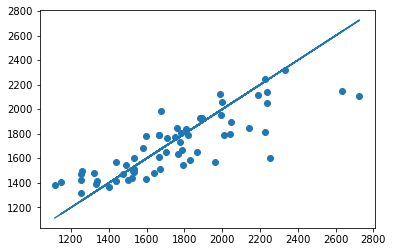

In [28]:
plt.plot(CI, CI)
plt.scatter(CI,predictions1)

Printing the loss between actual and predicted values

In [29]:
loss = y_test - predictions
loss

array([[-0.8113752 ],
       [ 1.88392276],
       [ 0.40480808],
       [ 0.4835407 ],
       [ 0.65879986],
       [-0.57543724],
       [-0.73535682],
       [ 0.65247079],
       [ 0.01372741],
       [ 0.13780715],
       [-0.49490557],
       [ 0.74914567],
       [-0.20404168],
       [-0.4208262 ],
       [ 0.15640502],
       [ 0.23096341],
       [-0.36471434],
       [-0.08983643],
       [ 0.09599397],
       [ 0.22948202],
       [-0.15787708],
       [ 0.08533465],
       [-0.0776446 ],
       [-0.09486825],
       [ 0.2882281 ],
       [ 0.51940003],
       [-0.14805304],
       [ 0.1611667 ],
       [-0.94692758],
       [-0.07963521],
       [-0.18775228],
       [-0.40740369],
       [ 0.06064081],
       [-0.52892375],
       [ 1.98478075],
       [ 1.47959366],
       [-0.38649124],
       [ 0.35917424],
       [-0.2051995 ],
       [ 0.06304949],
       [ 0.74318608],
       [ 1.19709546],
       [ 0.49362935],
       [ 0.14150022],
       [-0.31868996],
       [-0

RMSE value

In [30]:
root_mean_squared_error = sqrt(mean_squared_error(y_test,predictions))
root_mean_squared_error

0.6149897173419064

In [31]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(x_test,predictions)

LinearRegression()

R squared value

In [32]:
lm.score(x_test,predictions)

0.9681372342612856

Graph between actual and Predicted values

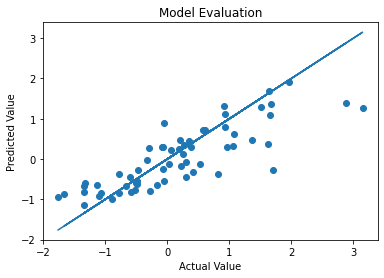

In [33]:
plt.title('Model Evaluation')
plt.xlabel('Actual Value')
plt.ylabel('Predicted Value')
plt.scatter(y_test,predictions)
plt.plot(y_test,y_test)

In [34]:
print(model_history.history.keys())

dict_keys(['loss', 'mae', 'mse', 'val_loss', 'val_mae', 'val_mse'])


Graph between Mean Absolute Error and No. of Epochs

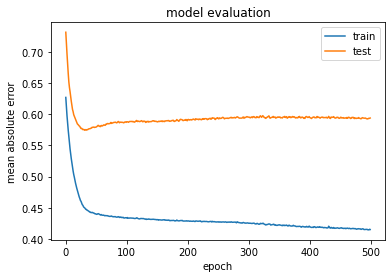

In [35]:
# Summarize history for evaluation
plt.plot(model_history.history['mae'])
plt.plot(model_history.history['val_mae'])
plt.title('model evaluation')
plt.ylabel('mean absolute error')
plt.xlabel('epoch')
plt.legend(['train','test'],loc = 'best')
plt.show()

Graph between Mean Square Error and No. of Epochs

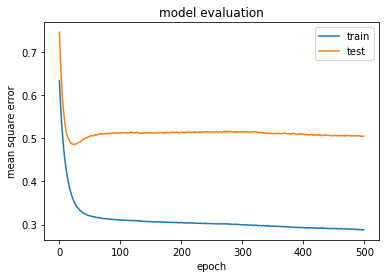

In [36]:
# Summarize history for accuracy
plt.plot(model_history.history['mse'])
plt.plot(model_history.history['val_mse'])
plt.title('model evaluation')
plt.ylabel('mean square error')
plt.xlabel('epoch')
plt.legend(['train','test'],loc = 'best')
plt.show()